In [81]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
#create initail 5 by 5 array, all values are none
arr = np.empty((5,5), dtype=object)
arr[:] = None
arr

array([[None, None, None, None, None],
       [None, None, None, None, None],
       [None, None, None, None, None],
       [None, None, None, None, None],
       [None, None, None, None, None]], dtype=object)

In [83]:
arr[0,1] = 15
arr[1,0] = 18
arr[1,1] = 16
arr[2,0] = 21
arr[3,0] = 24
arr[4,0] = 20
arr[4,1] = 23

# arr[0,6] = 15
# arr[1,6] = 17
# arr[1,7] = 17
# arr[2,7] = 20
# arr[2,8] = 21
# arr[3,8] = 23
# arr[4,8] = 23
# arr[4,9] = 24
arr

array([[None, 15, None, None, None],
       [18, 16, None, None, None],
       [21, None, None, None, None],
       [24, None, None, None, None],
       [20, 23, None, None, None]], dtype=object)

In [84]:
# Convert the array to a fully numeric format (replacing None with NaN)
inital_array = arr.copy()
arr_copy = arr.copy()
numeric_array = np.array(arr_copy, dtype=float)

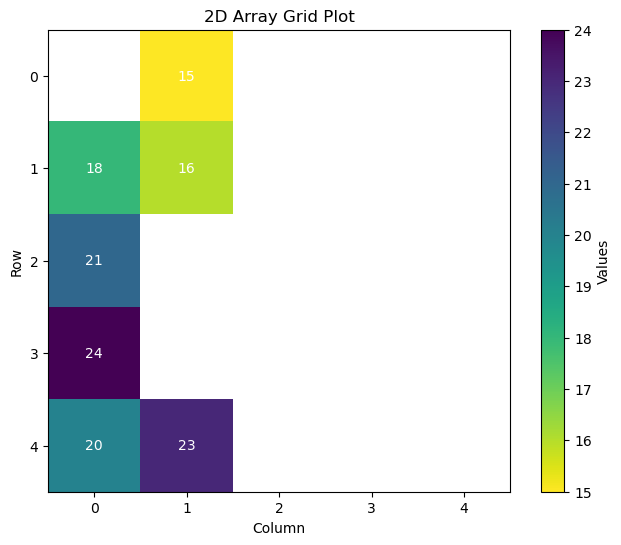

In [85]:
# Plotting the grid
plt.figure(figsize=(8, 6))
plt.imshow(numeric_array, cmap='viridis_r', interpolation='none')  # 'viridis' is just one of many available colormaps
plt.colorbar(label='Values')  # Adds a color bar to the side
plt.title('2D Array Grid Plot')
plt.xlabel('Column')
plt.ylabel('Row')

# Adding the values as text on the grid
for (i, j), val in np.ndenumerate(numeric_array):
    if not np.isnan(val):  # Only adding text for non-NaN values
        plt.text(j, i, int(val), ha='center', va='center', color='white')

plt.show()

In [86]:
def idw_interpolation(input_array):
    # Function to calculate the inverse distance weight
    def idw_calculate(x, y, known_points, power=3):
        weights = 0
        values = 0
        for px, py, pv in known_points:
            distance = np.sqrt((x - px) ** 2 + (y - py) ** 2)
            if distance > 0:
                weight = 1 / (distance ** power)
                weights += weight
                values += pv * weight
            else:  # distance is zero
                return pv
        return values / weights if weights != 0 else np.nan

    # Find known and unknown (None) points
    known_points = [(i, j, val) for i, row in enumerate(input_array)
                    for j, val in enumerate(row) if val is not None]
    for i, row in enumerate(input_array):
        for j, val in enumerate(row):
            if val is None:
                input_array[i][j] = idw_calculate(i, j, known_points)

    return input_array

In [87]:
new_arr = idw_interpolation(arr)
new_arr

array([[16.8185733464498, 15, 15.81428752905045, 16.867398289788245,
        17.638790468818907],
       [18, 16, 16.60289638790438, 17.52019480287147, 18.17131762821283],
       [21, 19.165320235704595, 18.535847175243372, 18.844953679814896,
        19.03571072669793],
       [24, 22.19344024091946, 21.271218783016998, 20.441015896271857,
        19.98733932957742],
       [20, 23, 22.384465993506616, 21.36374130805606,
        20.662107228975252]], dtype=object)

In [88]:
# Convert the array to a fully numeric format (replacing None with NaN)
arr_copy = new_arr.copy()
numeric_array = np.array(arr_copy, dtype=float)

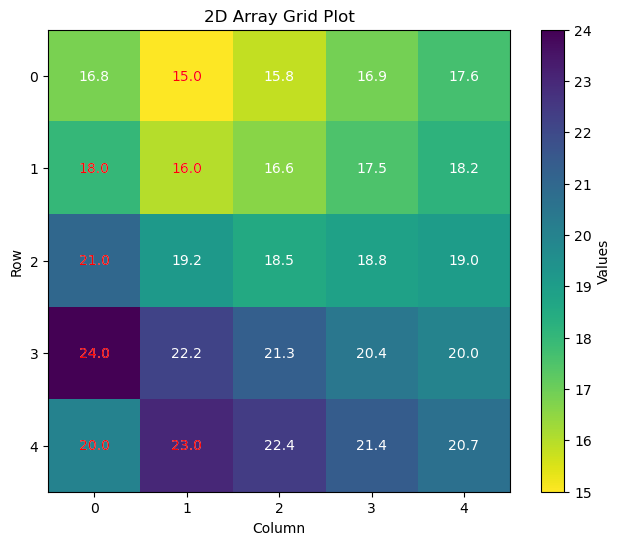

In [89]:
# Plotting the grid
plt.figure(figsize=(8, 6))
plt.imshow(numeric_array, cmap='viridis_r', interpolation='none')  # 'viridis' is just one of many available colormaps
plt.colorbar(label='Values')  # Adds a color bar to the side
plt.title('2D Array Grid Plot')
plt.xlabel('Column')
plt.ylabel('Row')

# Adding the values as text on the grid
for (i, j), val in np.ndenumerate(numeric_array):
    if not np.isnan(val):  # Only adding text for non-NaN values
        plt.text(j, i, round(val,1), ha='center', va='center', color='white')

for (i, j), val in np.ndenumerate(inital_array):
    if val is not None:  # Only adding text for non-NaN values
        plt.text(j, i, round(float(val),1), ha='center', va='center', color='red')

plt.show()

In [90]:
import plotly.graph_objects as go
import numpy as np

# Example 2D array (replace this with your array)
array = new_arr

# Create x and y coordinates for the grid
x = np.arange(array.shape[1])
y = np.arange(array.shape[0])

# Create a meshgrid for the surface plot
x_grid, y_grid = np.meshgrid(x, y)

# Create the surface plot
fig = go.Figure(data=[go.Surface(z=array, x=x_grid, y=y_grid)])

# Update the layout
fig.update_layout(title='3D Surface Plot of 2D Array', autosize=False,
                  width=1500, height=1500,
                  scene=dict(

                            aspectratio=dict(x=1, y=1, z=0.3)  # Adjust these values as needed
                        ),
                  margin=dict(l=65, r=50, b=65, t=90))

# Show the plot
fig.show()
